In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rich import print
from rich.table import Table

In [2]:
L = 5.

def reelle(xs):
    return np.sin(10 * np.pi * xs / L) / (1 + np.exp(3 * xs / L))


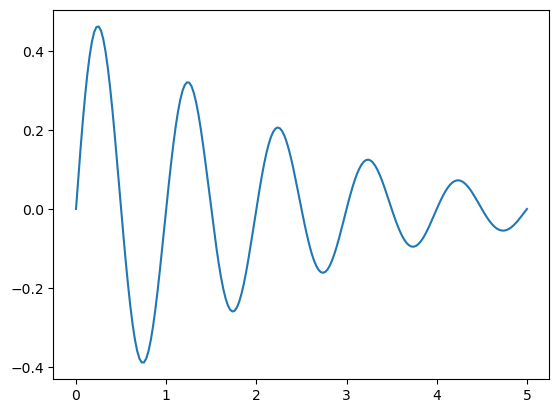

In [3]:
xs = np.linspace(0, L, 200)
ys = reelle(xs)

plt.plot(xs, ys)

In [4]:
N = 100
epsilon = 0.1

X = np.random.uniform(low=0., high=L, size=(N, 1))

vraies = reelle(X).reshape(N)
y = vraies + epsilon * np.random.randn(N)


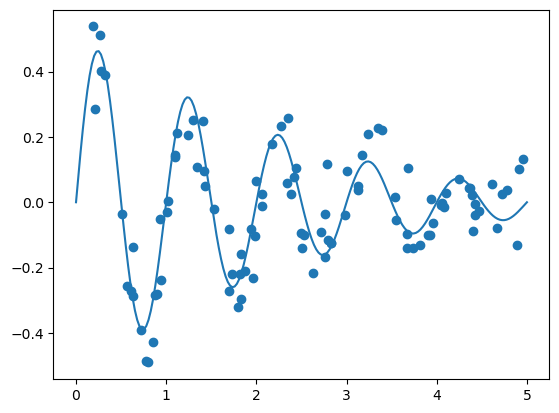

In [5]:
xs = np.linspace(0, L, 200)
ys = reelle(xs)

plt.plot(xs, ys)
plt.scatter(X.ravel(), y)

**EXERCICE** Faire une sélection d'un modèle avec ses hyperparamètres pour l'apprentissage du dataset précédent.

On essayera:
- LinearRegression
- RidgeRegression
- Lasso
- ElasticNet

Avec éventuellement PolynomialFeatures

Puis 
- SVR
- KNeighborsRegressor
- GradientBoostingRegressor
- RandomForestRegressor
- MLPRegressor


On consultera systématiquement la documentation de scikit-learn pour des recommandations sur l'utilisation des prédicteurs, en particulier sur les plages de recherche pour les hyperparamètres.

## Imports

In [6]:
from sklearn.model_selection import train_test_split, cross_validate

In [7]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler

In [8]:
from sklearn.pipeline import Pipeline

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor

## Préprocessing général

In [11]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y)

In [12]:
mms = MinMaxScaler(feature_range=(-1., 1.))

In [13]:
mms.fit(X_tr)

MinMaxScaler(feature_range=(-1.0, 1.0))

In [14]:
X_tr, X_te = mms.transform(X_tr), mms.transform(X_te)

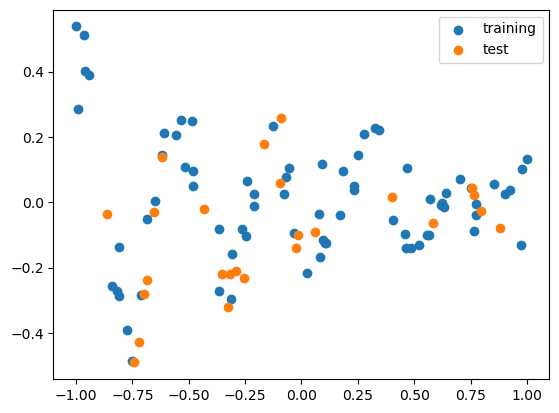

In [32]:
plt.scatter(X_tr.ravel(), y_tr, label="training")
plt.scatter(X_te.ravel(), y_te, label="test")
plt.legend()

## Validation Croisée

In [17]:
resultats = list()

### Modéles linéaires basiques

In [15]:
lr = LinearRegression()

In [19]:
resultats.append((lr, cross_validate(lr, X_tr, y_tr)))

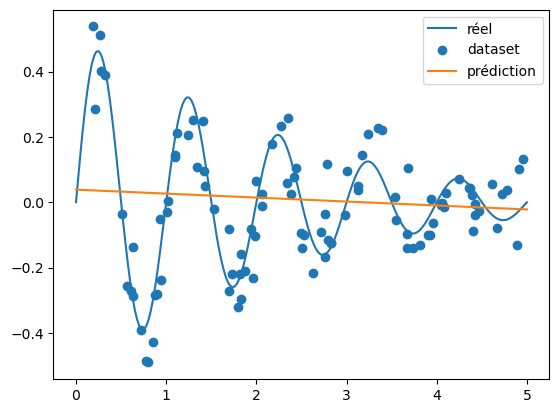

In [25]:
# analyse manuelle
lr.fit(X_tr, y_tr)

xs = np.linspace(0, L, 200)
ys = reelle(xs)

plt.plot(xs, ys, label="réel")
plt.scatter(X.ravel(), y, label="dataset")


y_pred = lr.predict(mms.transform(xs.reshape((-1, 1))))
plt.plot(xs, y_pred, label="prédiction")
plt.legend()

In [28]:
for alpha in np.logspace(-6, 6, 13):
    ridge = Ridge(alpha=alpha)
    resultats.append((ridge, cross_validate(ridge, X_tr, y_tr)))

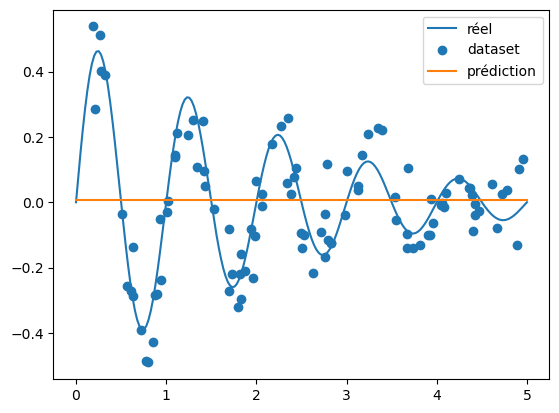

In [29]:
# analyse manuelle
ridge.fit(X_tr, y_tr)

xs = np.linspace(0, L, 200)
ys = reelle(xs)

plt.plot(xs, ys, label="réel")
plt.scatter(X.ravel(), y, label="dataset")


y_pred = ridge.predict(mms.transform(xs.reshape((-1, 1))))
plt.plot(xs, y_pred, label="prédiction")
plt.legend()

**REMARQUE** les modèles linéaires sont clairement en underfitting.

### Modéles linéaires avec PolynomialFeatures en preprocessing

In [30]:
for d in range(1, 20):
    modele = Pipeline(
        [
            ("Puissance", PolynomialFeatures(degree=d)),
            ("Régression_linéaire", LinearRegression())
        ]
    )
    resultats.append(
        (
            modele,
            cross_validate(modele, X_tr, y_tr)
        )
    )

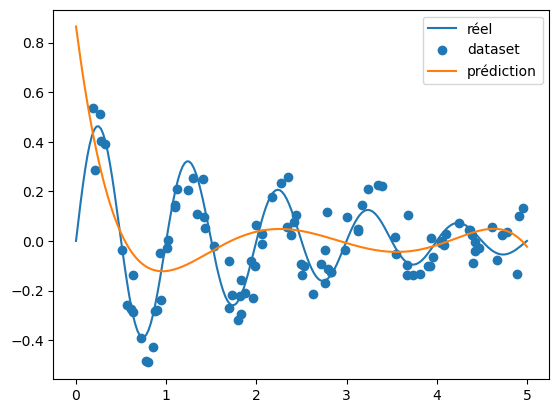

In [31]:
# Inspection manuelle

modele = Pipeline(
        [
            ("Puissance", PolynomialFeatures(degree=5)),
            ("Régression_linéaire", LinearRegression())
        ]
    )

modele.fit(X_tr, y_tr)

xs = np.linspace(0, L, 200)
ys = reelle(xs)

plt.plot(xs, ys, label="réel")
plt.scatter(X.ravel(), y, label="dataset")


y_pred = modele.predict(mms.transform(xs.reshape((-1, 1))))
plt.plot(xs, y_pred, label="prédiction")
plt.legend()

**EXERCICE**

Faire Ridge, Lasso et ElasticNet.

In [33]:
%%time
for d in range(1, 20):
    for alpha in np.logspace(-6, 6, 13):
        modele = Pipeline(
            [
                ("Puissance", PolynomialFeatures(degree=d)),
                ("Régression_linéaire", Ridge(alpha=alpha))
            ]
        )
        resultats.append(
            (
                modele,
                cross_validate(modele, X_tr, y_tr)
            )
        )

CPU times: user 811 ms, sys: 1.16 ms, total: 812 ms
Wall time: 811 ms


In [37]:
%%time
for d in range(1, 20):
    for alpha in np.logspace(-6, 6, 13):
        print(f"{d=}, {alpha=}")
        modele = Pipeline(
            [
                ("Puissance", PolynomialFeatures(degree=d)),
                ("Régression_linéaire", Lasso(alpha=alpha, max_iter=100_000))
            ]
        )
        resultats.append(
            (
                modele,
                cross_validate(modele, X_tr, y_tr)
            )
        )

d=1, alpha=1e-06

d=1, alpha=1e-05

d=1, alpha=0.0001

d=1, alpha=0.001

d=1, alpha=0.01

d=1, alpha=0.1

d=1, alpha=1.0

d=1, alpha=10.0

d=1, alpha=100.0

d=1, alpha=1000.0

d=1, alpha=10000.0

d=1, alpha=100000.0

d=1, alpha=1000000.0

d=2, alpha=1e-06

d=2, alpha=1e-05

d=2, alpha=0.0001

d=2, alpha=0.001

d=2, alpha=0.01

d=2, alpha=0.1

d=2, alpha=1.0

d=2, alpha=10.0

d=2, alpha=100.0

d=2, alpha=1000.0

d=2, alpha=10000.0

d=2, alpha=100000.0

d=2, alpha=1000000.0

d=3, alpha=1e-06

d=3, alpha=1e-05

d=3, alpha=0.0001

d=3, alpha=0.001

d=3, alpha=0.01

d=3, alpha=0.1

d=3, alpha=1.0

d=3, alpha=10.0

d=3, alpha=100.0

d=3, alpha=1000.0

d=3, alpha=10000.0

d=3, alpha=100000.0

d=3, alpha=1000000.0

d=4, alpha=1e-06

d=4, alpha=1e-05

d=4, alpha=0.0001

d=4, alpha=0.001

d=4, alpha=0.01

d=4, alpha=0.1

d=4, alpha=1.0

d=4, alpha=10.0

d=4, alpha=100.0

d=4, alpha=1000.0

d=4, alpha=10000.0

d=4, alpha=100000.0

d=4, alpha=1000000.0

d=5, alpha=1e-06

d=5, alpha=1e-05

d=5, alpha=0.0001

d=5, alpha=0.001

d=5, alpha=0.01

d=5, alpha=0.1

d=5, alpha=1.0

d=5, alpha=10.0

d=5, alpha=100.0

d=5, alpha=1000.0

d=5, alpha=10000.0

d=5, alpha=100000.0

d=5, alpha=1000000.0

d=6, alpha=1e-06

d=6, alpha=1e-05

d=6, alpha=0.0001

d=6, alpha=0.001

d=6, alpha=0.01

d=6, alpha=0.1

d=6, alpha=1.0

d=6, alpha=10.0

d=6, alpha=100.0

d=6, alpha=1000.0

d=6, alpha=10000.0

d=6, alpha=100000.0

d=6, alpha=1000000.0

d=7, alpha=1e-06

d=7, alpha=1e-05

d=7, alpha=0.0001

d=7, alpha=0.001

d=7, alpha=0.01

d=7, alpha=0.1

d=7, alpha=1.0

d=7, alpha=10.0

d=7, alpha=100.0

d=7, alpha=1000.0

d=7, alpha=10000.0

d=7, alpha=100000.0

d=7, alpha=1000000.0

d=8, alpha=1e-06

d=8, alpha=1e-05

d=8, alpha=0.0001

d=8, alpha=0.001

d=8, alpha=0.01

d=8, alpha=0.1

d=8, alpha=1.0

d=8, alpha=10.0

d=8, alpha=100.0

d=8, alpha=1000.0

d=8, alpha=10000.0

d=8, alpha=100000.0

d=8, alpha=1000000.0

d=9, alpha=1e-06

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.573e-01, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.822e-01, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.820e-01, tolerance: 2.135e-04
  model = cd_fast.enet_

d=9, alpha=1e-05

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.676e-02, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.223e-02, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.566e-02, tolerance: 2.135e-04
  model = cd_fast.enet_

d=9, alpha=0.0001

d=9, alpha=0.001

d=9, alpha=0.01

d=9, alpha=0.1

d=9, alpha=1.0

d=9, alpha=10.0

d=9, alpha=100.0

d=9, alpha=1000.0

d=9, alpha=10000.0

d=9, alpha=100000.0

d=9, alpha=1000000.0

d=10, alpha=1e-06

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.537e-01, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.649e-01, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.823e-01, tolerance: 2.135e-04
  model = cd_fast.enet_

d=10, alpha=1e-05

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.771e-02, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.508e-02, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.730e-02, tolerance: 2.135e-04
  model = cd_fast.enet_

d=10, alpha=0.0001

d=10, alpha=0.001

d=10, alpha=0.01

d=10, alpha=0.1

d=10, alpha=1.0

d=10, alpha=10.0

d=10, alpha=100.0

d=10, alpha=1000.0

d=10, alpha=10000.0

d=10, alpha=100000.0

d=10, alpha=1000000.0

d=11, alpha=1e-06

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.026e-01, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.934e-01, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.547e-01, tolerance: 2.135e-04
  model = cd_fast.enet_

d=11, alpha=1e-05

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.558e-02, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.692e-02, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.048e-02, tolerance: 2.135e-04
  model = cd_fast.enet_

d=11, alpha=0.0001

d=11, alpha=0.001

d=11, alpha=0.01

d=11, alpha=0.1

d=11, alpha=1.0

d=11, alpha=10.0

d=11, alpha=100.0

d=11, alpha=1000.0

d=11, alpha=10000.0

d=11, alpha=100000.0

d=11, alpha=1000000.0

d=12, alpha=1e-06

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.995e-01, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.827e-01, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.134e-01, tolerance: 2.135e-04
  model = cd_fast.enet_

d=12, alpha=1e-05

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.535e-02, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.621e-02, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.937e-02, tolerance: 2.135e-04
  model = cd_fast.enet_

d=12, alpha=0.0001

d=12, alpha=0.001

d=12, alpha=0.01

d=12, alpha=0.1

d=12, alpha=1.0

d=12, alpha=10.0

d=12, alpha=100.0

d=12, alpha=1000.0

d=12, alpha=10000.0

d=12, alpha=100000.0

d=12, alpha=1000000.0

d=13, alpha=1e-06

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.088e-01, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.022e-01, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.941e-01, tolerance: 2.135e-04
  model = cd_fast.enet_

d=13, alpha=1e-05

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.866e-03, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.455e-03, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.879e-02, tolerance: 2.135e-04
  model = cd_fast.enet_

d=13, alpha=0.0001

d=13, alpha=0.001

d=13, alpha=0.01

d=13, alpha=0.1

d=13, alpha=1.0

d=13, alpha=10.0

d=13, alpha=100.0

d=13, alpha=1000.0

d=13, alpha=10000.0

d=13, alpha=100000.0

d=13, alpha=1000000.0

d=14, alpha=1e-06

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.065e-01, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.020e-01, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.748e-01, tolerance: 2.135e-04
  model = cd_fast.enet_

d=14, alpha=1e-05

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.894e-03, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.864e-03, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.423e-04, tolerance: 2.135e-04
  model = cd_fast.enet_

d=14, alpha=0.0001

d=14, alpha=0.001

d=14, alpha=0.01

d=14, alpha=0.1

d=14, alpha=1.0

d=14, alpha=10.0

d=14, alpha=100.0

d=14, alpha=1000.0

d=14, alpha=10000.0

d=14, alpha=100000.0

d=14, alpha=1000000.0

d=15, alpha=1e-06

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e-01, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.763e-01, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.533e-01, tolerance: 2.135e-04
  model = cd_fast.enet_

d=15, alpha=1e-05

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.333e-02, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e-02, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.800e-03, tolerance: 2.135e-04
  model = cd_fast.enet_

d=15, alpha=0.0001

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.093e-03, tolerance: 2.067e-04
  model = cd_fast.enet_coordinate_descent(


d=15, alpha=0.001

d=15, alpha=0.01

d=15, alpha=0.1

d=15, alpha=1.0

d=15, alpha=10.0

d=15, alpha=100.0

d=15, alpha=1000.0

d=15, alpha=10000.0

d=15, alpha=100000.0

d=15, alpha=1000000.0

d=16, alpha=1e-06

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.725e-01, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.775e-01, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.543e-01, tolerance: 2.135e-04
  model = cd_fast.enet_

d=16, alpha=1e-05

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.309e-02, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.135e-02, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.117e-03, tolerance: 2.135e-04
  model = cd_fast.enet_

d=16, alpha=0.0001

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.853e-04, tolerance: 2.067e-04
  model = cd_fast.enet_coordinate_descent(


d=16, alpha=0.001

d=16, alpha=0.01

d=16, alpha=0.1

d=16, alpha=1.0

d=16, alpha=10.0

d=16, alpha=100.0

d=16, alpha=1000.0

d=16, alpha=10000.0

d=16, alpha=100000.0

d=16, alpha=1000000.0

d=17, alpha=1e-06

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e-01, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.614e-01, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.512e-01, tolerance: 2.135e-04
  model = cd_fast.enet_

d=17, alpha=1e-05

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.267e-03, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.147e-03, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.538e-03, tolerance: 2.135e-04
  model = cd_fast.enet_

d=17, alpha=0.0001

d=17, alpha=0.001

d=17, alpha=0.01

d=17, alpha=0.1

d=17, alpha=1.0

d=17, alpha=10.0

d=17, alpha=100.0

d=17, alpha=1000.0

d=17, alpha=10000.0

d=17, alpha=100000.0

d=17, alpha=1000000.0

d=18, alpha=1e-06

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.464e-01, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.603e-01, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.772e-01, tolerance: 2.135e-04
  model = cd_fast.enet_

d=18, alpha=1e-05

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.089e-03, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.926e-03, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.969e-03, tolerance: 2.135e-04
  model = cd_fast.enet_

d=18, alpha=0.0001

d=18, alpha=0.001

d=18, alpha=0.01

d=18, alpha=0.1

d=18, alpha=1.0

d=18, alpha=10.0

d=18, alpha=100.0

d=18, alpha=1000.0

d=18, alpha=10000.0

d=18, alpha=100000.0

d=18, alpha=1000000.0

d=19, alpha=1e-06

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.544e-01, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.717e-01, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.785e-01, tolerance: 2.135e-04
  model = cd_fast.enet_

d=19, alpha=1e-05

/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.432e-03, tolerance: 1.901e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.505e-03, tolerance: 2.365e-04
  model = cd_fast.enet_coordinate_descent(
/usr/lib/python3/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.637e-03, tolerance: 2.135e-04
  model = cd_fast.enet_

d=19, alpha=0.0001

d=19, alpha=0.001

d=19, alpha=0.01

d=19, alpha=0.1

d=19, alpha=1.0

d=19, alpha=10.0

d=19, alpha=100.0

d=19, alpha=1000.0

d=19, alpha=10000.0

d=19, alpha=100000.0

d=19, alpha=1000000.0

CPU times: user 14.1 s, sys: 13 ms, total: 14.1 s
Wall time: 14.1 s


**REMARQUE** les Warnings de convergence ont lieu lorsque $d$ est grand et la régularisation petite, c'est exactement un scénario d'overfitting. Le problème sera "réglé" avec la validation croisée.

**REMARQUE** ElasticNet est juste une combinaison de Ridge et de Lasso.

### Modèles plus sophistiqués

In [38]:
for nb_voisins in range(2, 10):
    modele = KNeighborsRegressor(n_neighbors=nb_voisins)
    resultats.append(
        (
            modele,
            cross_validate(modele, X_tr, y_tr),
        )
    )

In [41]:
np.max(np.abs(y_tr))

0.5378542773749808

In [42]:
# SVR

for C in np.logspace(-1, 2, 8):
    for mul_epsilon in np.logspace(-2, 0, 6):
        modele = SVR(C=C, epsilon=mul_epsilon * np.max(np.abs(y_tr)))
        resultats.append(
            (
                modele,
                cross_validate(modele, X_tr, y_tr)
            )
        )

In [44]:
# MLPRegressor

for nb_neurones in range(1, 20, 2):
    modele = MLPRegressor(hidden_layer_sizes=(nb_neurones,), max_iter=10_000)
    resultats.append(
            (
                modele,
                cross_validate(modele, X_tr, y_tr)
            )
        )

In [55]:
# GradientBoosting

for ne in range(10, 200, 10):
    for lr in (0.5, 1., 1.5):
        modele = GradientBoostingRegressor(n_estimators=ne, learning_rate=lr * 10 / ne)
        resultats.append(
                (
                    modele,
                    cross_validate(modele, X_tr, y_tr)
                )
        )


In [56]:
# RandomForest


for ne in range(10, 200, 10):
        modele = RandomForestRegressor(n_estimators=ne)
        resultats.append(
                    (
                        modele,
                        cross_validate(modele, X_tr, y_tr)
                    )
            )

## Mise en forme des résultats

In [63]:
def choix(res_cross_val):
    modele, dico = res_cross_val
    return np.mean(dico["test_score"]) + 0.01 * np.std(dico["test_score"])

In [64]:
resultats.sort(key=choix, reverse=True)

In [65]:
for (modele, dico) in resultats[:4]:
    print(f"""
{modele}: {np.mean(dico["test_score"])};     {np.std(dico["test_score"])}
    """)

KNeighborsRegressor(n_neighbors=3): 0.6838922807789072;     0.1363144304056912

RandomForestRegressor(n_estimators=10): 0.6605777261854952;     0.09893613641494599

KNeighborsRegressor(n_neighbors=4): 0.6585168563694358;     0.12186439044710443

Pipeline(steps=[('Puissance', PolynomialFeatures(degree=14)),
                ('Régression_linéaire', LinearRegression())]): 0.6533129851764147;     0.11119059644468154

**REMARQUE** On peut voir que pour le nombre d'estimateurs de RandomForest, le meilleur choix est au bord de la plage d'hyperparamètres recherchés, on pourrait reprendre cette plage.

In [61]:
meilleur = KNeighborsRegressor(n_neighbors=3)
meilleur.fit(X_tr, y_tr)

KNeighborsRegressor(n_neighbors=3)

In [62]:

print(f"""
entrainement: {meilleur.score(X_tr, y_tr)}
test: {meilleur.score(X_te, y_te)}
""")


entrainement: 0.8492159700276032
test: 0.6189357851331612

**CONCLUSION** on est un peu en overfitting mais le score de test est non négligeable.

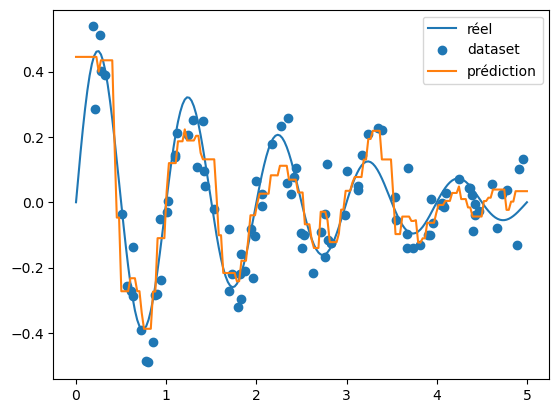

In [67]:

xs = np.linspace(0, L, 200)
ys = reelle(xs)

plt.plot(xs, ys, label="réel")
plt.scatter(X.ravel(), y, label="dataset")


y_pred = meilleur.predict(mms.transform(xs.reshape((-1, 1))))
plt.plot(xs, y_pred, label="prédiction")
plt.legend()

**REMARQUE** on a effectivement un peu d'overfitting, mais le modèle est quand m^eme acceptable.

Pour savoir si les scores sont acceptables au delà de l'aspect overfitting/underfitting, il est crucial d'avoir une alternative, non machine learning pour pouvoir quantifier l'apport du ML.